# Energetic analysis and plots - isothermal

I have computed the volume integrated background 

$$
\frac{\mathrm{d}E_{b}}{\mathrm{d}t} = \int_{V}g \rho z_{*} \mathrm{d}V
$$

where $z_{*}$ is the adiabatically sorted height as a function of density, the volume integrated potential energy

$$
\frac{\mathrm{d}E_{b}}{\mathrm{d}t} = \int_{V}g \rho z \mathrm{d}V
$$

and the volume integrated buoyancy flux between $z \in [-0.75, -0.25]$

$$
\int_{V} w \rho \mathrm{d}V.
$$

From these quantities I can get the available potential energy $$E_{p} - E_{a}$$ and the reversible buoyancy flux

$$
\int_{V} g\rho w \mathrm{d}V.
$$

In [3]:
cd("/g/data/e14/jb2381/CabbelingExperiments")
using Pkg
Pkg.activate(".")

  Activating project at `/g/data/e14/jb2381/CabbelingExperiments`


In [4]:
using NCDatasets, CairoMakie

In [5]:
cd("outputs_equaldiffusion/isothermal_stepchange_nothing_120min/")
energetics = "energy_diagnostics.nc"
ds = NCDataset(energetics)
t = ds[:time][:] ./ 60
Eb = ds[:∫Eb][:]
Ep = ds[:∫Ep][:]
ρw = ds[:ρw][:]
ϵ = ds[:∫ϵ][:]
close(ds)

closed Dataset

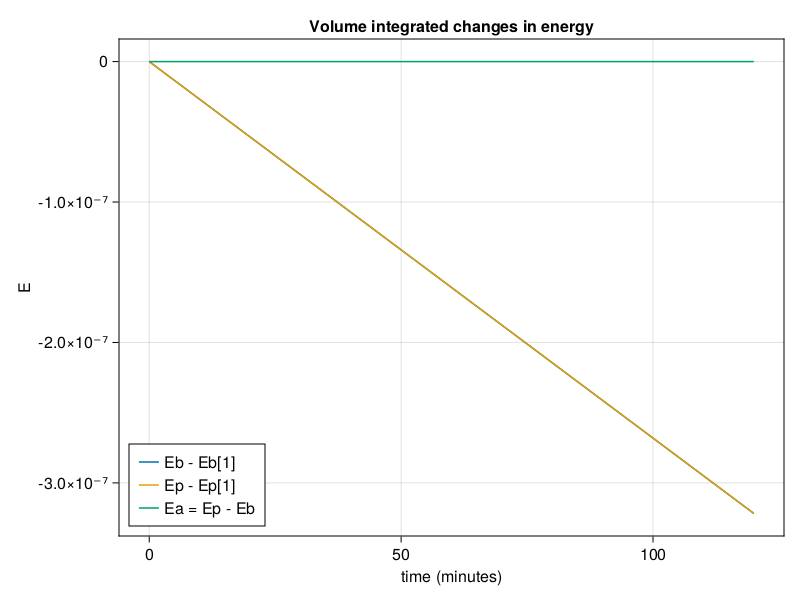

In [7]:
fig = Figure(size = (500, 500))
ax = Axis(fig[1, 1],
          title = "Volume integrated changes in energy",
          xlabel = "time (minutes)", ylabel = "E")
lines!(ax, t, Eb .- Eb[1], label = "Eb - Eb[1]")
lines!(ax, t, Ep .- Ep[1], label = "Ep - Ep[1]")
lines!(ax, t, Ep .- Eb, label = "Ea = Ep - Eb")
axislegend(ax, position = :lb)
fig

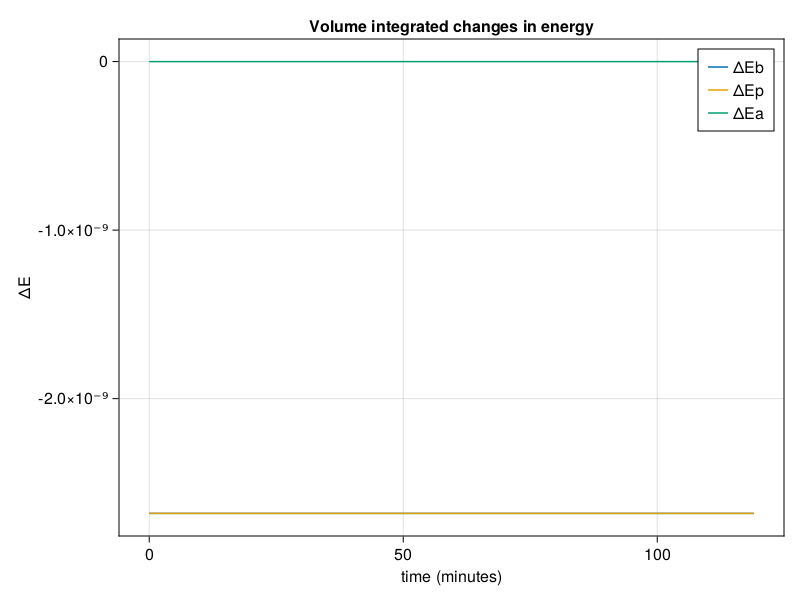

In [8]:
ΔEb = diff(Eb)
ΔEp = diff(Ep)
ΔEa = ΔEp .- ΔEb
fig = Figure(size = (500, 500))
ax = Axis(fig[1, 1],
          title = "Volume integrated changes in energy",
          xlabel = "time (minutes)", ylabel = "ΔE")
lines!(ax, t[1:end-1], ΔEb, label = "ΔEb")
lines!(ax, t[1:end-1], ΔEp, label = "ΔEp")
lines!(ax, t[1:end-1], ΔEa, label = "ΔEa")
axislegend(ax, position = :rt)
fig

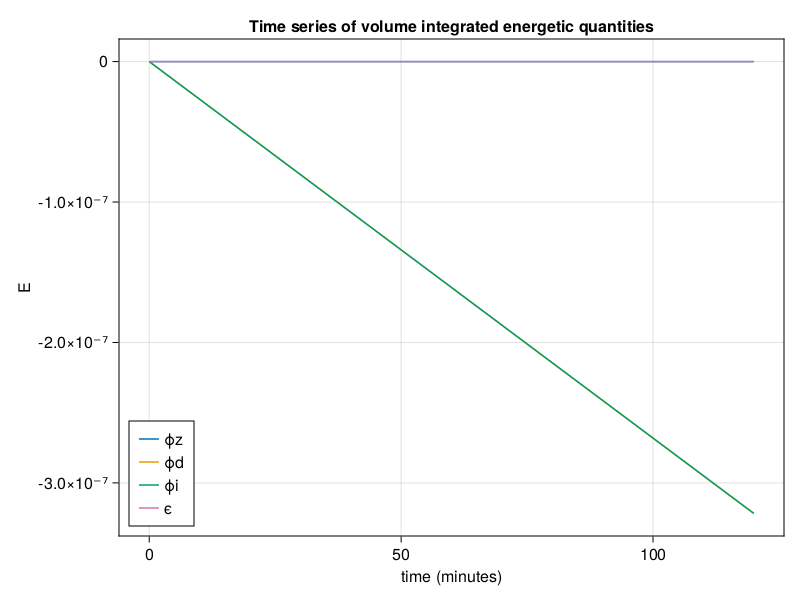

In [10]:
g = -9.81
ϕz = g .* ρw
ϕi = Ep .- ϕz
fig = Figure(size = (500, 500))
ax = Axis(fig[1, 1],
          title = "Time series of volume integrated energetic quantities",
          xlabel = "time (minutes)", ylabel = "E")
lines!(ax, t, ϕz, label = "ϕz")
lines!(ax, t, Eb .- Eb[1], label = "ϕd")
lines!(ax, t, ϕi .- ϕi[1], label = "ϕi")
lines!(ax, t, ϵ, label = "ϵ")
axislegend(ax, position = :lb)
fig

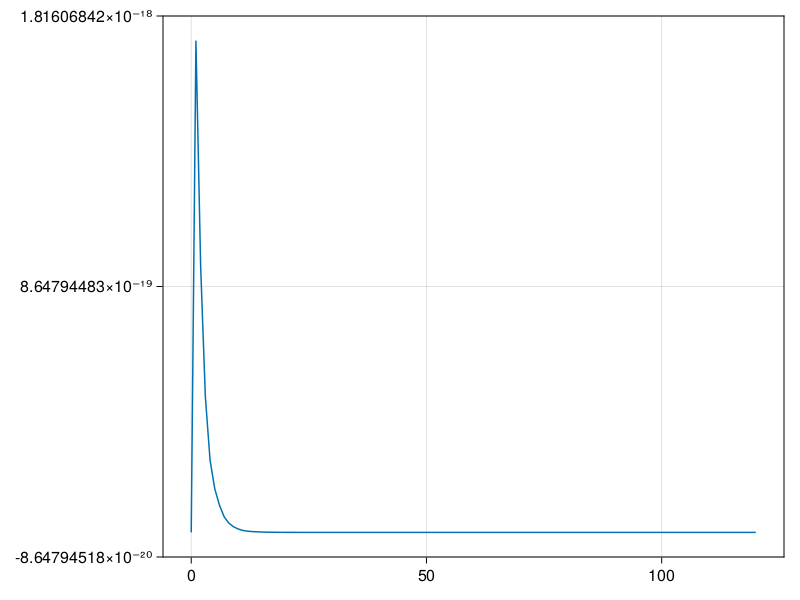

In [11]:
lines(t, ϵ)

In [12]:
mixing_efficiency = Eb ./ ϵ

121-element Vector{Float64}:
 Inf
  2.9145014584426578e19
  5.3802368317513695e19
  1.0544409929812997e20
  1.9822748293812188e20
  3.2825285483735535e20
  5.269525581921359e20
  9.182587328409706e20
  1.5524825788958732e21
  2.550294012562761e21
  4.2410726698945206e21
  7.433761716920266e21
  1.1697625094942852e22
  ⋮
  1.2868685946442404e30
  1.4431309459611857e30
  1.6176634755958588e30
  1.8134304728318262e30
  2.0324041544046327e30
  2.277177392540293e30
  2.550824857939034e30
  2.856164516336628e30
  3.198253473719096e30
  3.580012980382866e30
  4.005192908971041e30
  4.4758278704242576e30